## Install libraries if necessary

In [21]:
import pandas as pd

"""Comment out and run cell to install libraries"""
#!pip3 install ipympl
#!pip3 install ipywidgets
#!pip3 install matplotlib
#!pip3 install numpy
#!pip3 install pandas_datareader

'Comment out and run cell to install libraries'

## Import libraries

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas_datareader as web
import datetime
import ipympl

## Functions to import price data and trading dates

In [23]:
def read_price_data(stock_symbol, start_date, end_date, interval):
    """Import price data from Yahoo Finance"""
    stock_data = web.get_data_yahoo(stock_symbol, start_date, end_date, interval=interval)
    price_series = stock_data.loc[:, 'Adj Close']
    price_series = price_series.fillna(method='ffill')

    return price_series

In [24]:
def get_date_list(stock_symbol, start_date, end_date, interval):
    """Generate list of trading dates"""
    stock_data = web.get_data_yahoo(stock_symbol, start_date, end_date, interval=interval)
    date_list = stock_data.index
    
    return date_list

## Import stock data

In [25]:
def getStockData(symbol):
    stock_symbol = symbol # Stock symbol

    # Set time period
    start_date = datetime.datetime(2022, 3, 29)
    end_date = datetime.datetime(2022, 9, 29)
    interval = 'd' # Date interval, by default daily ('d')

    # Import price series and list of trading days
    try:
        date_list = get_date_list(stock_symbol, start_date, end_date, interval=interval)
        date_list_per = get_date_list(stock_symbol, start_date, end_date - datetime.timedelta(1), interval=interval)
        date_list_avg = get_date_list(stock_symbol, start_date, end_date - datetime.timedelta(2), interval=interval)
        price_series = read_price_data(stock_symbol, start_date, end_date, interval=interval)


        length = len(price_series)
        stock_return = []
        for(x) in range(length - 1):
            day_return_stock = ((price_series[x + 1] - price_series[x]) / price_series[x])
            stock_return.append(day_return_stock)
    except:
        print('Import failed for ', stock_symbol, "\n Retrying")
        date_list, price_series, date_list_per, stock_return, date_list_avg = getStockData(stock_symbol)

    print('Import Successful for ', stock_symbol)
    return date_list, price_series, date_list_per, stock_return, date_list_avg

def averageDailyReturn(returns):
    avg_return = []
    count = len(returns)
    length = len(returns[0])
    for(x) in range(length - 1):
        day_sum_return = 0
        for (r) in returns:
            day_sum_return += r[x]
        day_avg_return = day_sum_return/count
        avg_return.append(day_avg_return)
    return avg_return

## Plot price series with annotations

Date
2022-03-29    39.770000
2022-03-30    41.070000
2022-03-31    42.160000
2022-04-01    41.029999
2022-04-04    40.560001
                ...    
2022-09-23    29.270000
2022-09-26    27.870001
2022-09-27    26.969999
2022-09-28    27.750000
2022-09-29    26.355000
Name: Adj Close, Length: 128, dtype: float64
Date
2022-03-29    44.430000
2022-03-30    44.299999
2022-03-31    43.660000
2022-04-01    43.939999
2022-04-04    44.049999
                ...    
2022-09-23    39.509998
2022-09-26    38.560001
2022-09-27    37.320000
2022-09-28    38.130001
2022-09-29    37.619999
Name: Adj Close, Length: 128, dtype: float64
Date
2022-03-29    38.360001
2022-03-30    38.650002
2022-03-31    39.529999
2022-04-01    39.220001
2022-04-04    39.549999
                ...    
2022-09-23    40.150002
2022-09-26    38.799999
2022-09-27    38.250000
2022-09-28    38.820000
2022-09-29    38.090000
Name: Adj Close, Length: 131, dtype: float64
Date
2022-03-29    53.450001
2022-03-30    55.610001
2022-

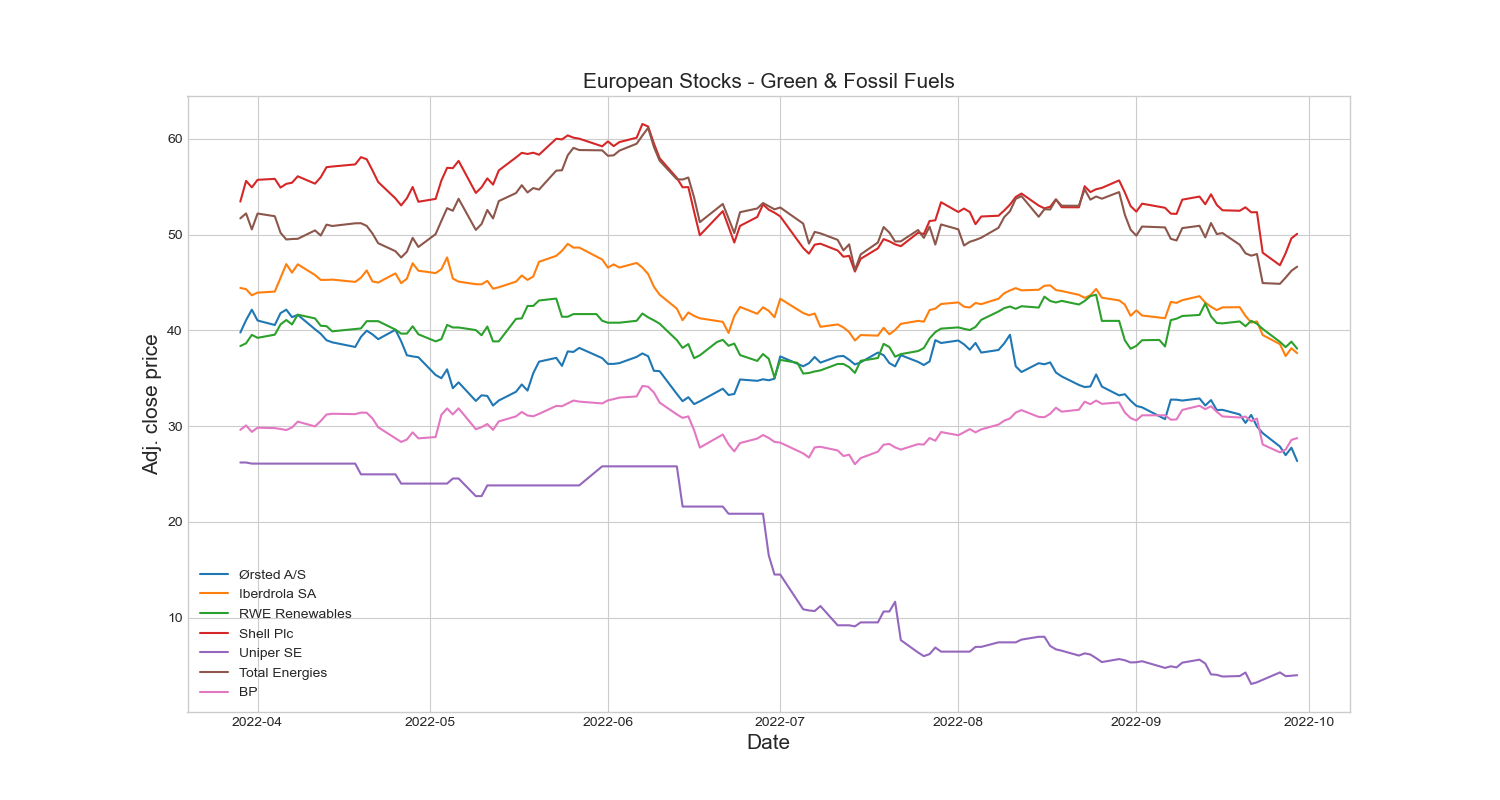

In [26]:
# Set to '%matplotlib widget' to create interactive plot (default is %matplotlib inline)
%matplotlib widget

fig, ax = plt.subplots(figsize=(15, 8))

# Set gridlines
plt.style.use('seaborn-whitegrid')

# Set options for interactive plot
fig.canvas.toolbar_visible = True
fig.canvas.resizable = True

# Set labels
plt.title('European Stocks - Green & Fossil Fuels', fontdict = {'fontsize' : 15})
plt.xlabel('Date', fontdict = {'fontsize' : 15})
plt.ylabel('Adj. close price', fontdict = {'fontsize' : 15})

# Plot annotated price series
# Green Stocks
ØrstedData = getStockData("DNNGY")
IberdrolaData = getStockData("IBDRY")
RWEData = getStockData("RWE.DE")

plt.plot(ØrstedData[0], ØrstedData[1], label="Ørsted A/S")
plt.plot(IberdrolaData[0], IberdrolaData[1], label="Iberdrola SA")
plt.plot(RWEData[0], RWEData[1], label="RWE Renewables")

# Fossil Fuel Stocks
ShellData = getStockData("SHEL")
UniperData = getStockData("UNPRF")
TotalData = getStockData("TTE")
BPData = getStockData("BP")

plt.plot(ShellData[0], ShellData[1], label="Shell Plc")
plt.plot(UniperData[0], UniperData[1], label="Uniper SE")
plt.plot(TotalData[0], TotalData[1], label="Total Energies")
plt.plot(BPData[0], BPData[1], label="BP")

plt.legend()
plt.show()

Date
2022-03-29     84.589996
2022-03-30     81.940002
2022-03-31     83.739998
2022-04-01     84.010002
2022-04-04     83.959999
                 ...    
2022-09-23    129.850006
2022-09-26    128.210007
2022-09-27    132.309998
2022-09-28    136.190002
2022-09-29    130.929993
Name: Adj Close, Length: 128, dtype: float64
Date
2022-03-29    22.020000
2022-03-30    20.910000
2022-03-31    21.480000
2022-04-01    21.410000
2022-04-04    24.040001
                ...    
2022-09-23    24.690001
2022-09-26    24.100000
2022-09-27    24.559999
2022-09-28    24.660000
2022-09-29    22.540001
Name: Adj Close, Length: 128, dtype: float64
Date
2022-03-29    84.620003
2022-03-30    85.500000
2022-03-31    84.709999
2022-04-01    85.709999
2022-04-04    85.620003
                ...    
2022-09-23    82.519997
2022-09-26    81.150002
2022-09-27    81.080002
2022-09-28    82.370003
2022-09-29    79.970001
Name: Adj Close, Length: 128, dtype: float64
Date
2022-03-29    37.040001
2022-03-30    36.4

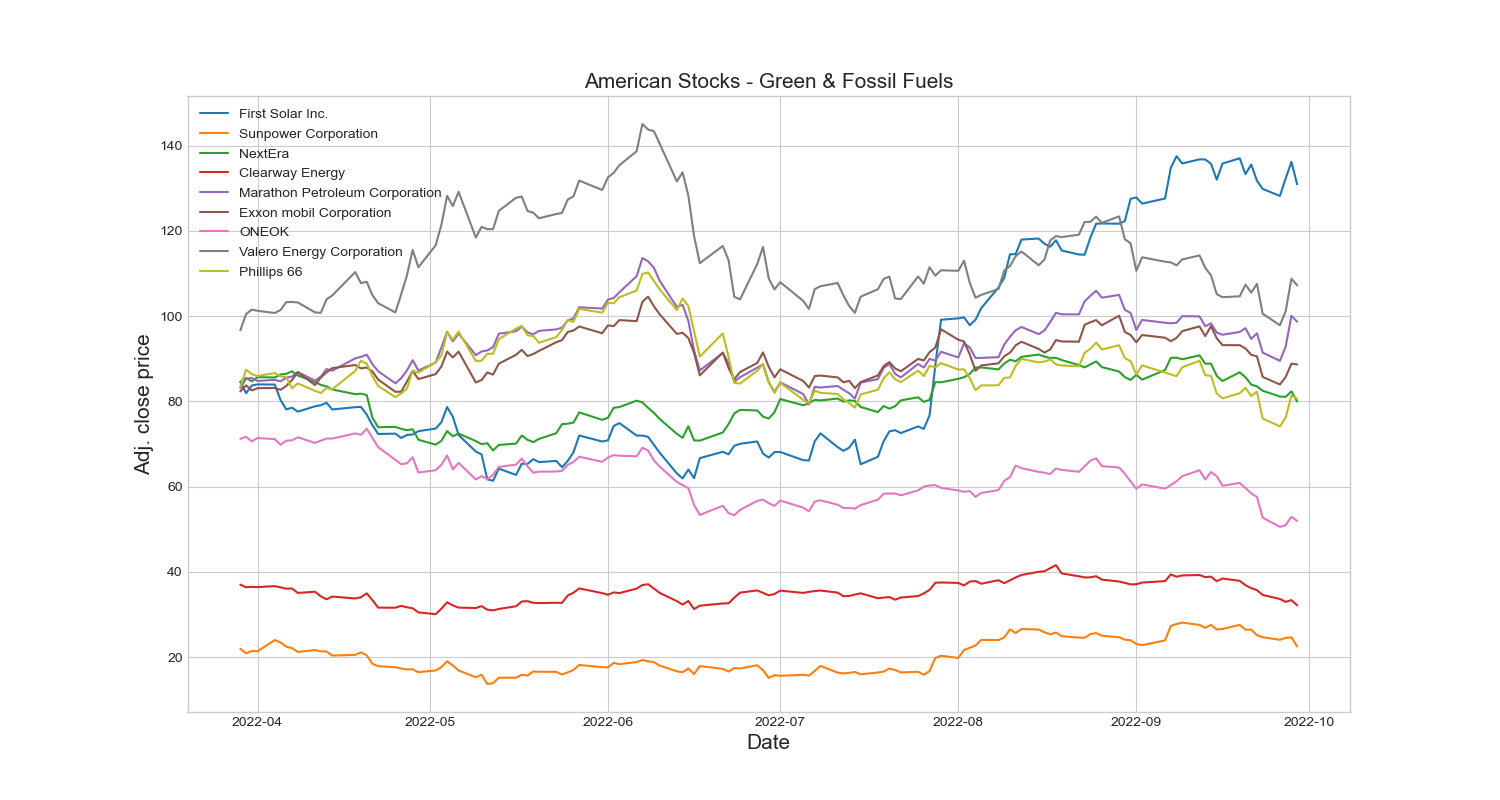

In [27]:
# Set to '%matplotlib widget' to create interactive plot (default is %matplotlib inline)
%matplotlib widget

fig, ax = plt.subplots(figsize=(15, 8))

# Set gridlines
plt.style.use('seaborn-whitegrid')

# Set options for interactive plot
fig.canvas.toolbar_visible = True
fig.canvas.resizable = True

# Set labels
plt.title('American Stocks - Green & Fossil Fuels', fontdict = {'fontsize' : 15})
plt.xlabel('Date', fontdict = {'fontsize' : 15})
plt.ylabel('Adj. close price', fontdict = {'fontsize' : 15})

# Plot annotated price series
# Green Stocks
FirstSolarData = getStockData("FSLR")
SunPowerData = getStockData("SPWR")
NEData = getStockData("NEE")
ClearwayData = getStockData("CWEN")

plt.plot(FirstSolarData[0], FirstSolarData[1], label="First Solar Inc.")
plt.plot(SunPowerData[0], SunPowerData[1], label="Sunpower Corporation")
plt.plot(NEData[0], NEData[1], label="NextEra")
plt.plot(ClearwayData[0], ClearwayData[1], label="Clearway Energy")

# Fossil Fuel Stocks
MPCDATA = getStockData("MPC")
ExxonData = getStockData("XOM")
ONEOKData = getStockData("OKE")
ValData = getStockData("VLO")
PhilData = getStockData("PSX")

plt.plot(MPCDATA[0], MPCDATA[1], label="Marathon Petroleum Corporation")
plt.plot(ExxonData[0], ExxonData[1], label="Exxon mobil Corporation")
plt.plot(ONEOKData[0], ONEOKData[1], label="ONEOK")
plt.plot(ValData[0], ValData[1], label="Valero Energy Corporation")
plt.plot(PhilData[0], PhilData[1], label="Phillips 66")

plt.legend()
plt.show()

In [28]:
#Make Events
def getIndex(yyyy, m, d, date_list):
   index = "none"
   while index == "none":
       for x in range(len(date_list)):
          if (date_list[x] == datetime.datetime(yyyy, m, d)):
              index = x
              break
          elif datetime.datetime(yyyy, m, d) <= date_list[0]:
               return 0
       d -= 1
       if d == 0:
           d = 28
           m -= 1
           if m == 0:
               m = 12
               yyyy -= 1
   return index


def makeEvent(yyyy, m, d, text, ax, date_list, price_series):
   index = getIndex(yyyy, m, d, date_list)
   ax.annotate(text,
           xy=(date_list[index], price_series[index]),
           xycoords='data',
           bbox=dict(boxstyle="square", fc="none", ec="gray"),
           xytext=(0, 80),
           textcoords='offset points',
           arrowprops=dict(arrowstyle='->', color='gray'),
           va='center',
           ha='left',
           fontsize=8)

Date
2022-03-29    39.770000
2022-03-30    41.070000
2022-03-31    42.160000
2022-04-01    41.029999
2022-04-04    40.560001
                ...    
2022-09-23    29.270000
2022-09-26    27.870001
2022-09-27    26.969999
2022-09-28    27.750000
2022-09-29    26.355000
Name: Adj Close, Length: 128, dtype: float64
Date
2022-03-29    44.430000
2022-03-30    44.299999
2022-03-31    43.660000
2022-04-01    43.939999
2022-04-04    44.049999
                ...    
2022-09-23    39.509998
2022-09-26    38.560001
2022-09-27    37.320000
2022-09-28    38.130001
2022-09-29    37.619999
Name: Adj Close, Length: 128, dtype: float64
Date
2022-03-29    38.360001
2022-03-30    38.650002
2022-03-31    39.529999
2022-04-01    39.220001
2022-04-04    39.549999
                ...    
2022-09-23    40.150002
2022-09-26    38.799999
2022-09-27    38.250000
2022-09-28    38.820000
2022-09-29    38.090000
Name: Adj Close, Length: 131, dtype: float64
Date
2022-03-29    4631.600098
2022-03-30    4602.450195
2

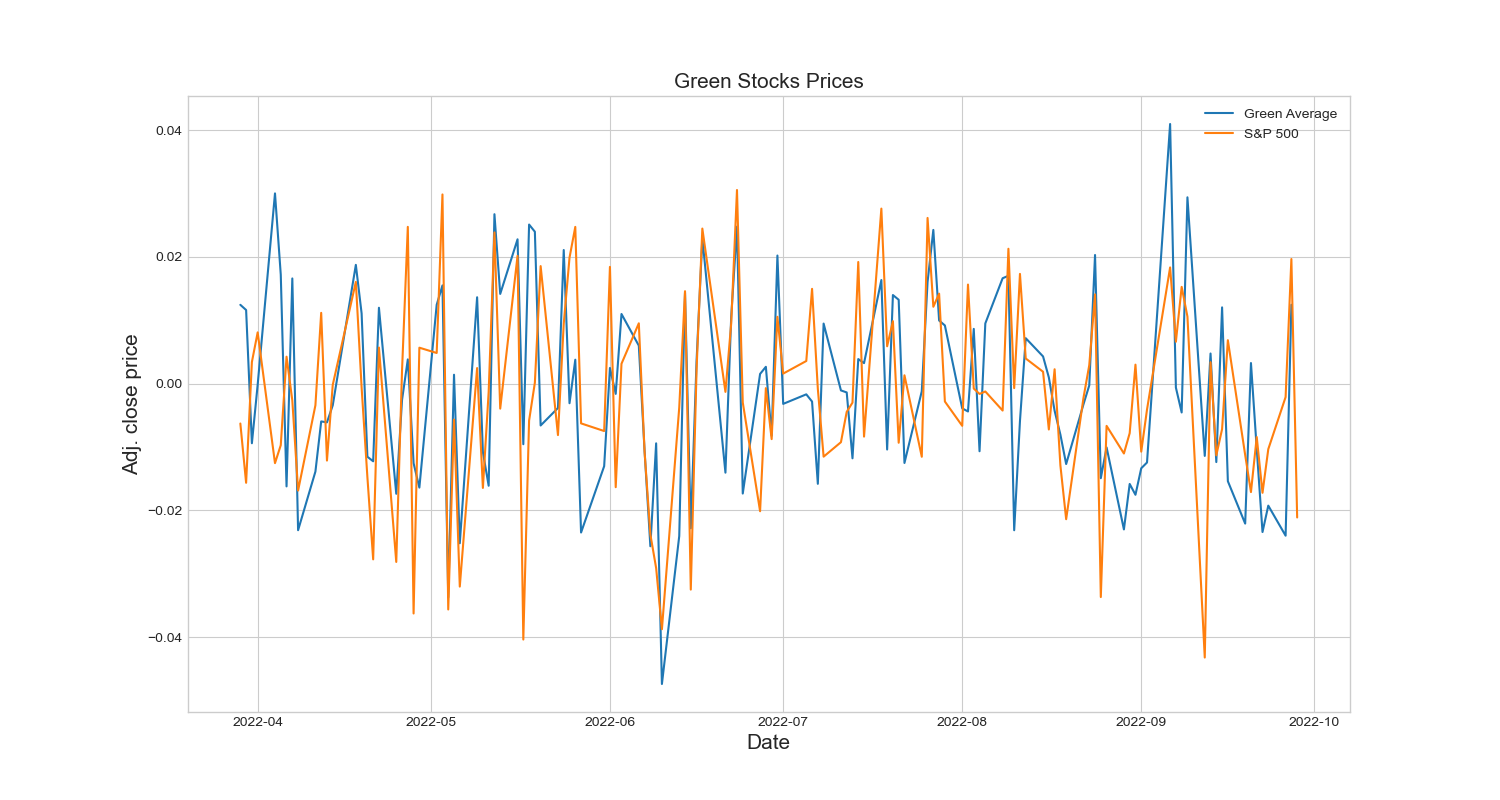

In [29]:
# Set to '%matplotlib widget' to create interactive plot (default is %matplotlib inline)
%matplotlib widget

fig, ax2 = plt.subplots(figsize=(15, 8))

# Set gridlines
plt.style.use('seaborn-whitegrid')

# Set options for interactive plot
fig.canvas.toolbar_visible = True
fig.canvas.resizable = True

# Set labels
plt.title('Green Stocks Prices', fontdict = {'fontsize' : 15})
plt.xlabel('Date', fontdict = {'fontsize' : 15})
plt.ylabel('Adj. close price', fontdict = {'fontsize' : 15})

# Plot annotated price series
ØrstedData = getStockData("DNNGY")
IberdrolaData = getStockData("IBDRY")
RWEData = getStockData("RWE.DE")
S_PData = getStockData("^GSPC")
averageGreenReturn = averageDailyReturn([ØrstedData[3], IberdrolaData[3], RWEData[3]])
plt.plot(ØrstedData[4], averageGreenReturn, label="Green Average")
plt.plot(S_PData[2], S_PData[3], label="S&P 500")
plt.legend()
plt.show()